In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Reshape
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import stft
import joblib
import time
import os

In [51]:
# Load the dataset
file_path = "output2.csv"  # Change to your file path
df = pd.read_csv(file_path, delimiter=';', low_memory=False)

In [28]:
# Display count of each output category
y_counts = df['Condition'].value_counts()
print("Output Category Counts:")
print(y_counts)

Output Category Counts:
Condition
healthy           210
scracth            60
notchlong          30
notchshort         30
singlecutlong      30
singlecutshort     30
twocutlong         30
twocutshort        30
warped             30
Name: count, dtype: int64


In [52]:
# Identify columns with only one unique value and remove them
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
df_cleaned = df.drop(columns=single_value_columns)

In [53]:
# Extract features and target variable
X = df_cleaned.drop(columns=['Condition'])
y = df_cleaned['Condition'].values  # Convert to numpy array

In [5]:
# Convert non-numeric columns to numeric where possible
X = X.apply(pd.to_numeric, errors='coerce')

In [6]:
# Handle missing values by replacing them with the median of each column
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

c:\Users\90544\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Speed_a_power' 'Speed_a_std_power' 'Speed_b_power' 'Speed_b_max_power'
 'Speed_b_mean_frequency' 'Speed_c_power' 'Speed_c_mean_frequency'
 'Speed_d_power' 'Speed_d_mean_frequency' 'Speed_e_power'
 'Speed_e_mean_frequency' 'Speed_f_power' 'Speed_f_mean_frequency'
 'Speed_g_power' 'Speed_g_mean_frequency' 'Speed_h_power'
 'Speed_h_mean_frequency' 'Speed_i_power' 'Speed_i_mean_frequency'
 'Voice_a_power' 'Voice_a_max_power' 'Voice_a_std_power'
 'Voice_a_median_power' 'Voice_b_power' 'Voice_b_max_power'
 'Voice_b_std_power' 'Voice_b_median_power' 'Voice_b_mean_frequency'
 'Voice_c_power' 'Voice_c_max_power' 'Voice_c_std_power'
 'Voice_c_median_power' 'Voice_c_mean_frequency' 'Voice_d_power'
 'Voice_d_max_power' 'Voice_d_std_power' 'Voice_d_median_power'
 'Voice_d_mean_frequency' 'Voice_e_power' 'Voice_e_max_power'
 'Voice_e_std_

In [30]:
# Split the dataset into train (80%) and test (20%) sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.20, stratify=y, random_state=47)

In [31]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [33]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=47),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=47),
    "KNN": KNeighborsClassifier(n_neighbors=4),
    "SVM": SVC(kernel='linear', random_state=47)
}


Random Forest Cross-Validation Accuracy: 0.5992
Random Forest Test Inference Time: 0.0060 seconds
Random Forest Classification Report:
                 precision    recall  f1-score   support

       healthy       0.60      1.00      0.75        42
     notchlong       0.60      0.50      0.55         6
    notchshort       0.00      0.00      0.00         6
       scracth       1.00      0.08      0.15        12
 singlecutlong       0.80      0.67      0.73         6
singlecutshort       0.17      0.17      0.17         6
    twocutlong       0.33      0.33      0.33         6
   twocutshort       1.00      0.33      0.50         6
        warped       1.00      0.17      0.29         6

      accuracy                           0.58        96
     macro avg       0.61      0.36      0.38        96
  weighted avg       0.63      0.58      0.51        96



c:\Users\90544\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\90544\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\90544\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

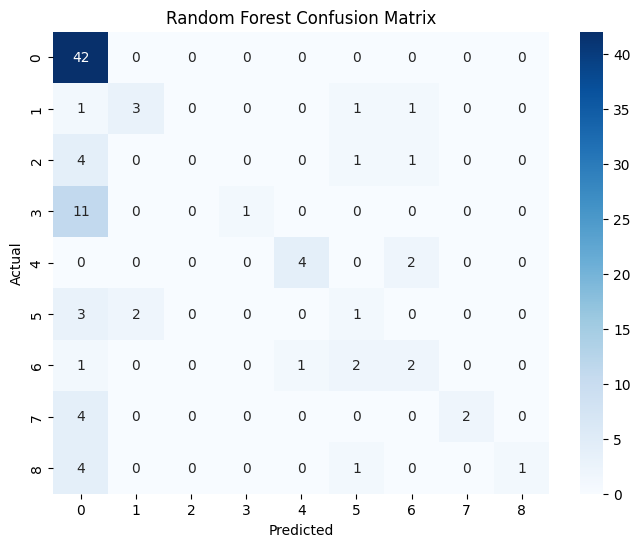

Gradient Boosting Cross-Validation Accuracy: 0.5549
Gradient Boosting Test Inference Time: 0.0030 seconds
Gradient Boosting Classification Report:
                 precision    recall  f1-score   support

       healthy       0.61      0.90      0.73        42
     notchlong       0.29      0.33      0.31         6
    notchshort       0.00      0.00      0.00         6
       scracth       0.33      0.17      0.22        12
 singlecutlong       0.67      0.67      0.67         6
singlecutshort       0.00      0.00      0.00         6
    twocutlong       0.50      0.33      0.40         6
   twocutshort       0.50      0.17      0.25         6
        warped       0.40      0.33      0.36         6

      accuracy                           0.53        96
     macro avg       0.37      0.32      0.33        96
  weighted avg       0.46      0.53      0.47        96



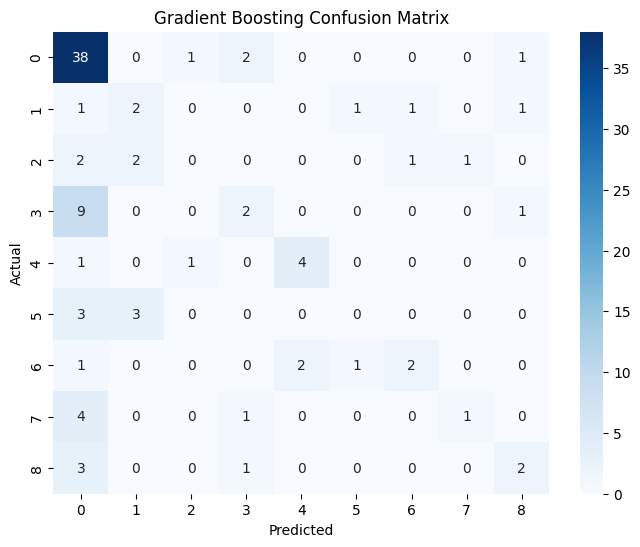

KNN Cross-Validation Accuracy: 0.5263
KNN Test Inference Time: 0.0050 seconds
KNN Classification Report:
                 precision    recall  f1-score   support

       healthy       0.54      1.00      0.70        42
     notchlong       0.40      0.33      0.36         6
    notchshort       1.00      0.17      0.29         6
       scracth       0.00      0.00      0.00        12
 singlecutlong       0.50      0.17      0.25         6
singlecutshort       0.33      0.17      0.22         6
    twocutlong       0.50      0.33      0.40         6
   twocutshort       0.00      0.00      0.00         6
        warped       0.00      0.00      0.00         6

      accuracy                           0.51        96
     macro avg       0.36      0.24      0.25        96
  weighted avg       0.41      0.51      0.40        96



c:\Users\90544\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\90544\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\90544\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

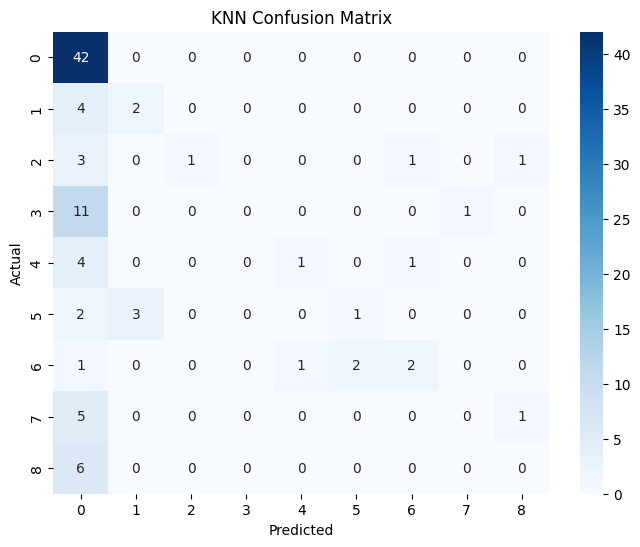

SVM Cross-Validation Accuracy: 0.5422
SVM Test Inference Time: 0.0040 seconds
SVM Classification Report:
                 precision    recall  f1-score   support

       healthy       0.69      0.88      0.77        42
     notchlong       0.50      0.50      0.50         6
    notchshort       0.50      0.33      0.40         6
       scracth       0.25      0.17      0.20        12
 singlecutlong       0.83      0.83      0.83         6
singlecutshort       0.67      0.67      0.67         6
    twocutlong       0.75      0.50      0.60         6
   twocutshort       0.67      0.33      0.44         6
        warped       0.40      0.33      0.36         6

      accuracy                           0.62        96
     macro avg       0.58      0.51      0.53        96
  weighted avg       0.60      0.62      0.60        96



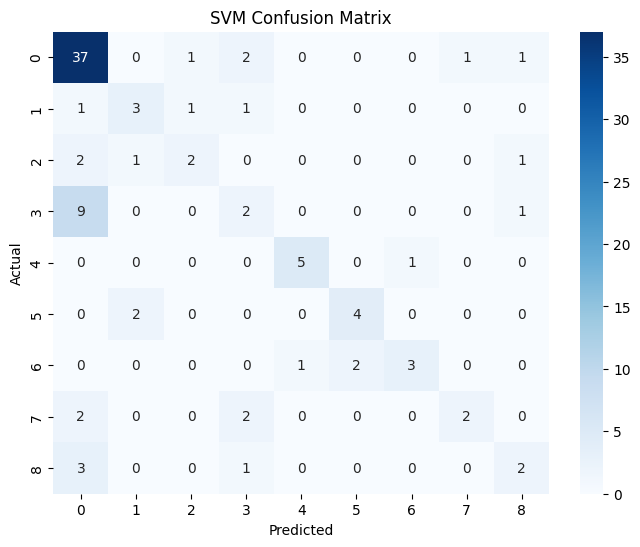

In [34]:
# Perform stratified 10-fold cross-validation and train models
for name, model in models.items():
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=47)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    model.fit(X_train_scaled, y_train)
    joblib.dump(model, f"{name.replace(' ', '_').lower()}_model.pkl")
    
    # Evaluate on the test set
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    end_time = time.time()
    test_time = end_time - start_time
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display results
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    print(f"{name} Test Inference Time: {test_time:.4f} seconds")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix with counts
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()